In [21]:
from ema_workbench import (
    TimeSeriesOutcome, 
    ScalarOutcome,
    perform_experiments, 
    RealParameter,
    CategoricalParameter,
    ema_logging, 
    MultiprocessingEvaluator,
    ScalarOutcome,
    ArrayOutcome,
    Constant,
    Model,
    Policy
)
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.em_framework import CategoricalParameter
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [22]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.kde as kde


In [23]:
if __name__ == "__main__":
    ema_logging.log_to_stderr(ema_logging.INFO)
   

In [24]:
wd = r"./Models"
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel no policy.vpmx") 
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel exisiting policy.vpmx")
#model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel new policy.vpmx")
model = VensimModel("simpleModel", wd=wd, model_file="Thesismodel no policy1.vpmx")

In [25]:
model.outcomes = [
#     TimeSeriesOutcome('Industrial CO2 savings with green hydrogen'),
#     TimeSeriesOutcome("MW installed"),
#     TimeSeriesOutcome("LCOH[green hydrogen]"),
    #TimeSeriesOutcome("satisfied demand"),
#    TimeSeriesOutcome("hydrogen type demand[green hydrogen]"),
#    TimeSeriesOutcome("kpi"),
    #TimeSeriesOutcome("total project funnel[green hydrogen]"),
    #TimeSeriesOutcome("Hydrogen type demand[green hydrogen]"),
    #TimeSeriesOutcome("total development time[green hydrogen]"),
    ScalarOutcome('max mw installed', variable_name='MW installed',function=np.max),
    ScalarOutcome('min production costs', variable_name='LCOH[green hydrogen]',function=np.min),

]

In [26]:
model.uncertainties = [
#Green H2
    RealParameter("Learning rate",0.04,0.06),
    RealParameter("Innovation cycle",4,6),
    RealParameter("Relative elasticity",-0.8,-0.4),
    RealParameter("Market adaptation speed",0.4,0.8),
    RealParameter("Scaling factor",0.5,2),
    RealParameter("Electrolysis development",0.08,0.31),
    RealParameter("Max efficiency",0.8,0.9),
    RealParameter("CO2 elasticity", 0.4,0.8),
    RealParameter("Market maturity",0.2,0.6),
    RealParameter("Initial CAPEX", 4000, 6500),
    RealParameter("Operation & maintenance costs",0.05,0.15),
#H2 Demand
    RealParameter("Demand substitution rate",0.1,2),
    RealParameter("Price elasticity of demand[Green hydrogen]",-3,-1.5),
    RealParameter("Price elasticity of demand[Blue hydrogen]",-2.5,-1,),
    RealParameter("Price elasticity of demand[Grey hydrogen]",-1,0),
    RealParameter("Substitution delay",1.5,4.5),
    RealParameter("Premium value[Refineries]",0,1000),
    RealParameter("Premium value[Methanol]",0,1000),
    RealParameter("Premium value[Ammonia]",0,1000),
    RealParameter("Premium value[Steel]",0,1000),
    RealParameter("Premium value[Transport]",0,2000),
    RealParameter("Premium value[Synthetic fuels]",0,2000),
    RealParameter("Allocation key SDE",0,0.2),
    RealParameter("Allocation key",0,0.2),
    
# #RES

    RealParameter("Roadmap WOZ",1000,2000),
    RealParameter("Onshore RES increase",0.01,0.04),
    RealParameter("Other additional renewables",0.01,0.04),
    RealParameter("Domestic electrification",0.03,0.05),
    RealParameter("Min Capex",500,2000),
    RealParameter("Policy market size adjustment[Refineries]",0.01,0.03),
    RealParameter("Policy market size adjustment[Methanol]",-0.02,0.02),
    RealParameter("Policy market size adjustment[Transport]",-0.02,0.02),
    RealParameter("Policy market size adjustment[Ammonia]",-0.02,0.02),
    RealParameter("Policy market size adjustment[EFuels]",-0.02,0.02),
    
# #Energy demand
    RealParameter("Transport fuel substitution rate", 0.1,0.2),
    RealParameter("Industrial energy substitution rate",0.1,0.2),
    RealParameter("Long term price effect",0.2,0.4),
    RealParameter("Short term price effect",0.1,0.3),
    RealParameter("Oil price",70,110),
    RealParameter("Coal price",70,110),
    RealParameter("Initial gas price",50,70),
    RealParameter("Initial electricity price",50,70),
    RealParameter("Biofuel price",1900,2100),
    RealParameter("Efuel price",2400,2600),
    RealParameter("Market reaction delay",0.8,1.2),
    RealParameter("Energy carrier demand elasticity",-0.6,-0.4),
    RealParameter("Business cycle",5,7),
    RealParameter("Average GDP growth",0.01,0.03),
    RealParameter("Innovation factor[Synthetic fuels]",0.01,0.02),
    RealParameter("Innovation factor[Biofuels]",0.01,0.02),
    RealParameter("Innovation factor[Electricity]",0.01,0.02),
    RealParameter("Efficiency increase",0.01,0.02)
                  ]

In [27]:
# policies = [
#         Policy("No policy", model_file=r"Thesismodel no policy.vpmx"),
# #        Policy("Existing policy", model_file=r"Thesismodel exisiting policy.vpmx"),
# #        Policy("New policy", model_file=r"Thesismodel new policy.vpmx"),
#     ]

In [28]:
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    results = evaluator.perform_experiments(scenarios=5000)
    #, policies = policies)

C:\Users\bern\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:349: UserWarning: the number of processes cannot be more then 8
  warnings.warn(f"the number of processes cannot be more then {max_processes}")
[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments
100%|██████████████████████████████████████| 5000/5000 [20:14<00:00,  4.12it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [29]:
experiments, outcomes = results
outcomes

{'TIME': array([[2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ],
        [2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ],
        [2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ],
        ...,
        [2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ],
        [2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ],
        [2020.    , 2020.0078, 2020.0156, ..., 2049.9844, 2049.9922,
         2050.    ]], dtype=float32),
 'max mw installed': array([769.1769 , 809.32996, 792.2889 , ..., 779.38824, 817.2144 ,
        812.2952 ], dtype=float32),
 'min production costs': array([5304.5605, 3855.6638, 3494.1428, ..., 5022.9688, 3245.5344,
        4465.5493], dtype=float32)}

In [30]:
# from ema_workbench import save_results
# save_results(results, r'./0804.tar.gz')

**PRIM capacity barrier**

In [31]:
x = outcomes['max mw installed']
p = np.nanpercentile(x,20)
x = x<p
x = x.astype(int)
x = x.flatten()

In [32]:
from ema_workbench.analysis import prim

prim_alg = prim.Prim(experiments, x, threshold=0.6, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.8217054263565892, mass: 0.0516, coverage: 0.212, density: 0.8217054263565892 restricted_dimensions: 8


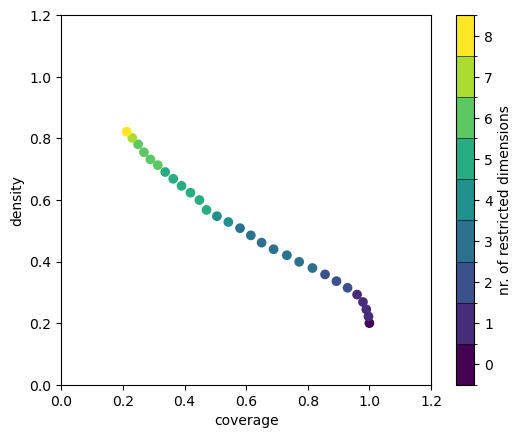

In [33]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

coverage     0.448000
density      0.599732
id          18.000000
mass         0.149400
mean         0.599732
res_dim      5.000000
Name: 18, dtype: float64

                                                box 18               \
                                                   min          max   
Roadmap WOZ                                1000.153634  1477.721969   
Efficiency increase                           0.010000     0.017269   
Policy market size adjustment[Refineries]     0.010001     0.026468   
Onshore RES increase                          0.010004     0.036813   
Demand substitution rate                      0.897029     1.999774   

                                                                       
                                               qp value      qp value  
Roadmap WOZ                                         NaN  1.604110e-42  
Efficiency increase                                 NaN  1.155808e-06  
Policy market size adjustment[Refineries]           NaN 

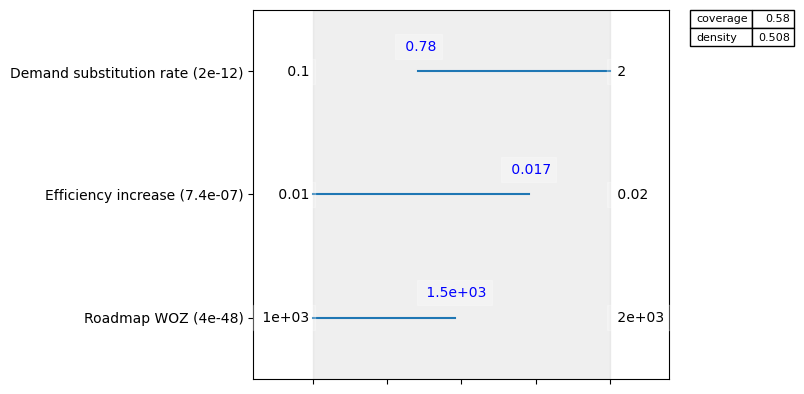

In [34]:
box1.inspect(18)
box1.inspect(14,style="graph")
plt.show()

**PRIM capacity driver**

In [35]:
y = outcomes['max mw installed']
p = np.nanpercentile(y,80)
y = y>p
y = y.astype(int)
y = y.flatten()


In [36]:
prim_alg = prim.Prim(experiments, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.8953488372093024, mass: 0.0516, coverage: 0.231, density: 0.8953488372093024 restricted_dimensions: 6


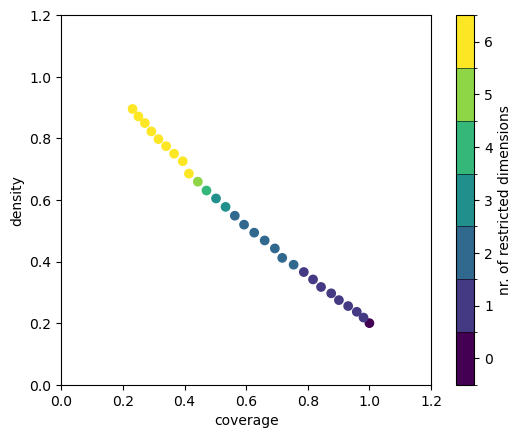

In [37]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

coverage     0.231000
density      0.895349
id          28.000000
mass         0.051600
mean         0.895349
res_dim      6.000000
Name: 28, dtype: float64

                                             box 28               \
                                                min          max   
Demand substitution rate                   0.100284     0.917449   
Domestic electrification                   0.030004     0.043975   
Roadmap WOZ                             1528.854702  1999.873039   
Other additional renewables                0.020511     0.039994   
Policy market size adjustment[Ammonia]    -0.005974     0.019997   
Onshore RES increase                       0.015859     0.039998   

                                                                    
                                            qp value      qp value  
Demand substitution rate                         NaN  2.359231e-25  
Domestic electrification                         NaN  7.885912e-04  
Roadmap WOZ          

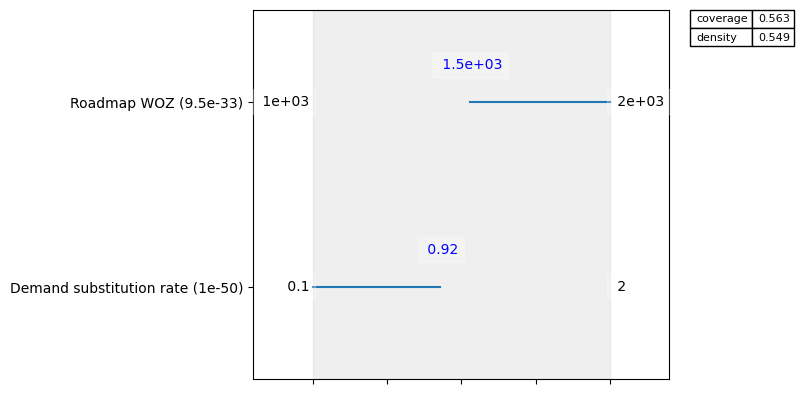

In [38]:
box1.inspect()
box1.inspect(15,style="graph")
plt.show()